# 1. Mini Project 4 - Predict Customer Clicked Ads Classification by Using Machine Learning

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Documents/Mini Project 4 - Predict Customer Clicked Ads Classification by Using Machine Learning/Clicked Ads Dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [4]:
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [5]:
df[categoricals].describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [3]:
categoricals = ['Male', 'Timestamp', 'Clicked on Ad', 'city', 'province', 'category']
numericals = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']

# 1. Univariate Analysis

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16248\109248711.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16248\109248711.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16248\109248711.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


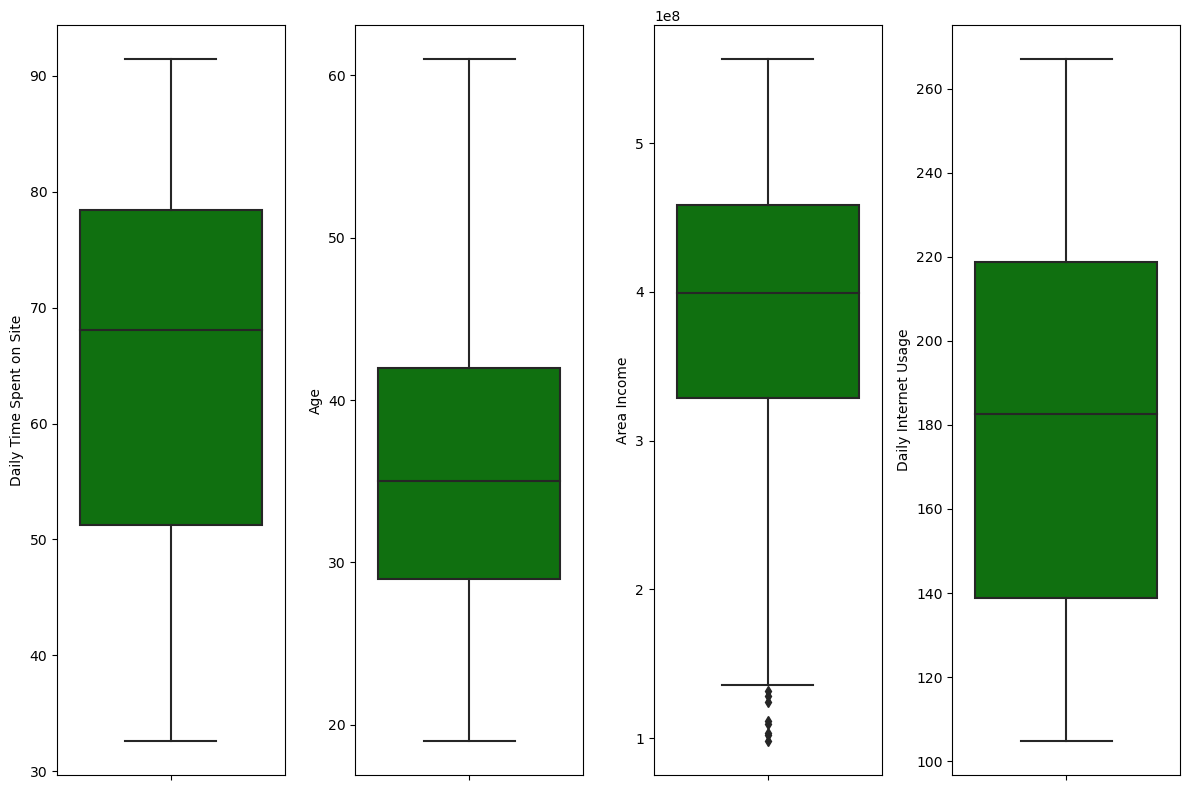

In [12]:
features = numericals
plt.figure(figsize=(12, 8))
for i in range (0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green', orient='v')
    plt.tight_layout()

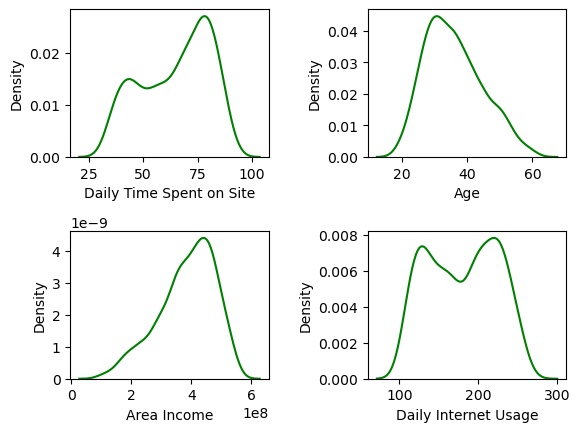

In [32]:
features = numericals
num_features = len(features)

num_rows = 2
num_cols = 2

for i in range (num_features):
    plt.subplot(num_rows, num_cols, i+1)
    sns.kdeplot(df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16248\1975877510.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16248\1975877510.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16248\1975877510.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16248\1975877510.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16248\1975877510.py:17: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


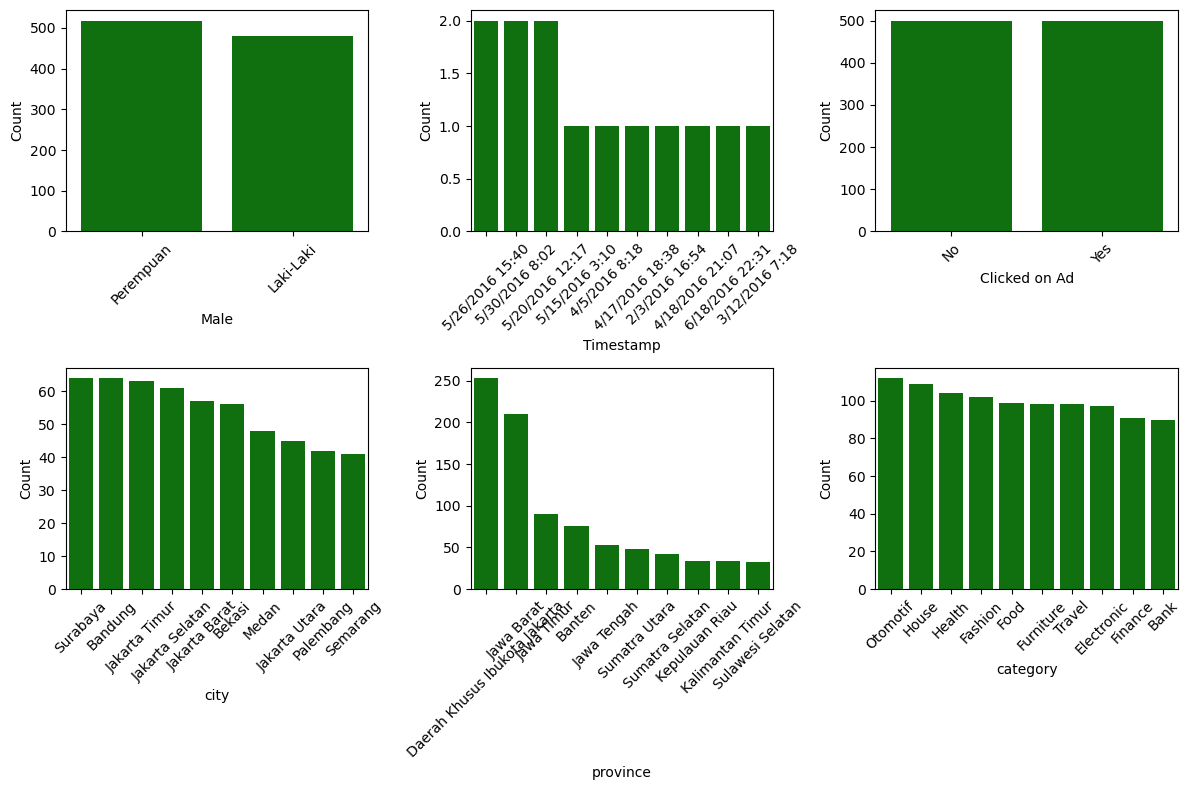

In [24]:
features = categoricals
plt.figure(figsize=(12, 8))
num_features = len(features)


num_rows = 2
num_cols = 3

for i in range (num_features):
    plt.subplot(num_rows, num_cols,  i+1)
    top_10_data = df[categoricals[i]].value_counts().head(10)
    
    sns.barplot(x=top_10_data.index, y=top_10_data.values, color='green')
    plt.xticks(rotation=45)
    plt.xlabel(categoricals[i])
    plt.ylabel('Count')
    plt.tight_layout()
    
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16540\2029764310.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16540\2029764310.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16540\2029764310.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


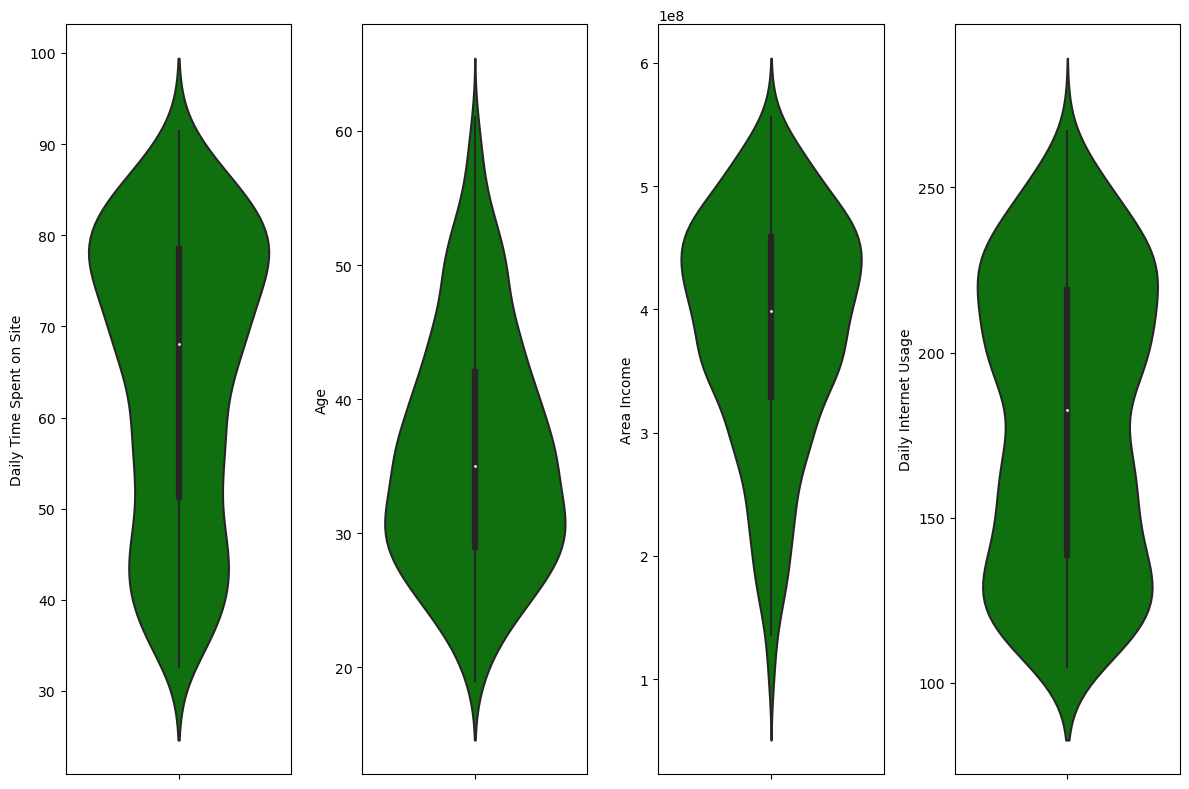

In [9]:
features = numericals
plt.figure(figsize=(12, 8))

for i in range (0,len(features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(y=df[features[i]], color='green')
    plt.tight_layout()

# 1b. Bivariate Analysis

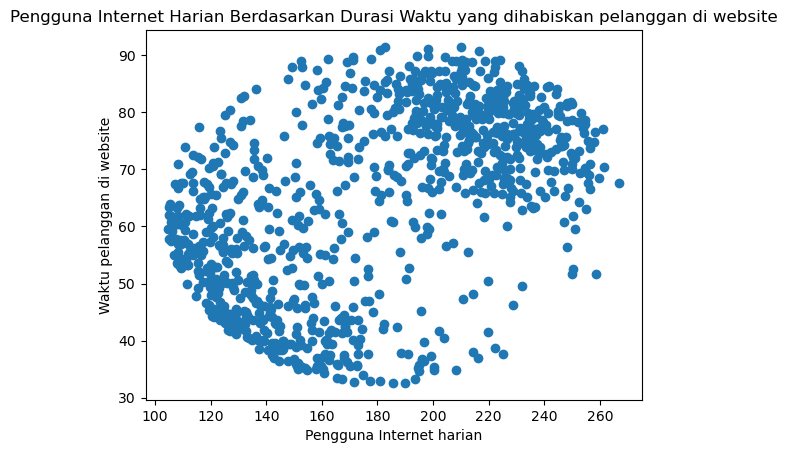

Korelasi antara Pengguna Internet Harian dan 'Waktu Kunjungan Website: 0.5182943293780016
        Unnamed: 0  Daily Time Spent on Site          Age   Area Income  \
count  1000.000000                987.000000  1000.000000  9.870000e+02   
mean    499.500000                 64.929524    36.009000  3.848647e+08   
std     288.819436                 15.844699     8.785562  9.407999e+07   
min       0.000000                 32.600000    19.000000  9.797550e+07   
25%     249.750000                 51.270000    29.000000  3.286330e+08   
50%     499.500000                 68.110000    35.000000  3.990683e+08   
75%     749.250000                 78.460000    42.000000  4.583554e+08   
max     999.000000                 91.430000    61.000000  5.563936e+08   

       Daily Internet Usage  
count            989.000000  
mean             179.863620  
std               43.870142  
min              104.780000  
25%              138.710000  
50%              182.650000  
75%              218.790

In [5]:
plt.scatter(df['Daily Internet Usage'], df['Daily Time Spent on Site'])
plt.xlabel('Pengguna Internet harian')
plt.ylabel('Waktu pelanggan di website')
plt.title('Pengguna Internet Harian Berdasarkan Durasi Waktu yang dihabiskan pelanggan di website')

plt.show()

correlation= df['Daily Internet Usage'].corr(df['Daily Time Spent on Site'])
print(f"Korelasi antara Pengguna Internet Harian dan 'Waktu Kunjungan Website: {correlation}")

summary = df.describe()
print(summary)

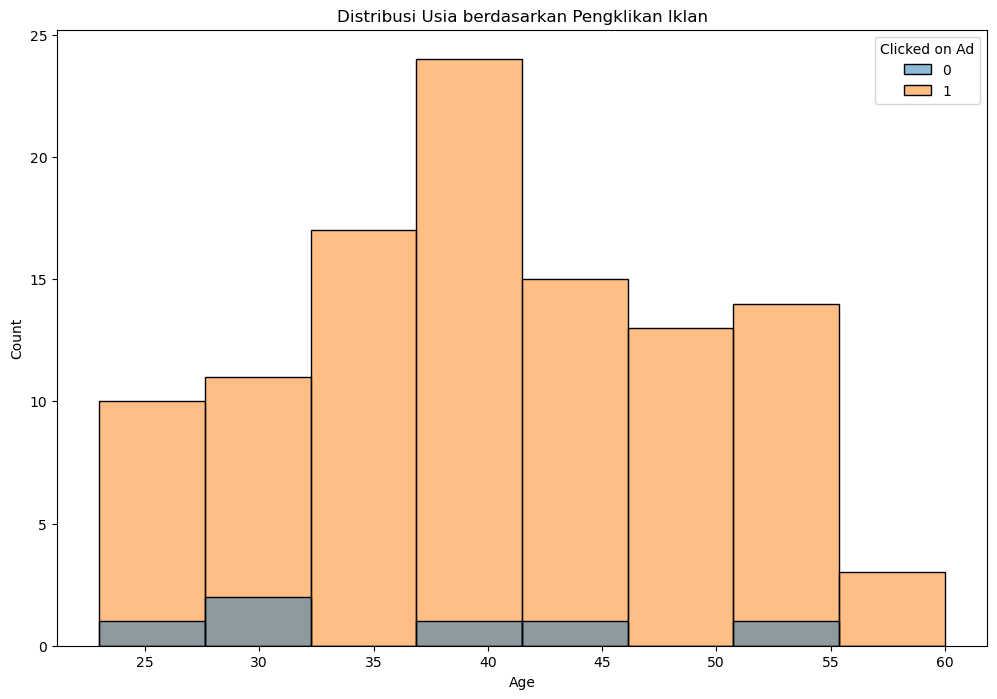

In [54]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Age', hue='Clicked on Ad')
plt.title('Distribusi Usia berdasarkan Pengklikan Iklan')
plt.show()

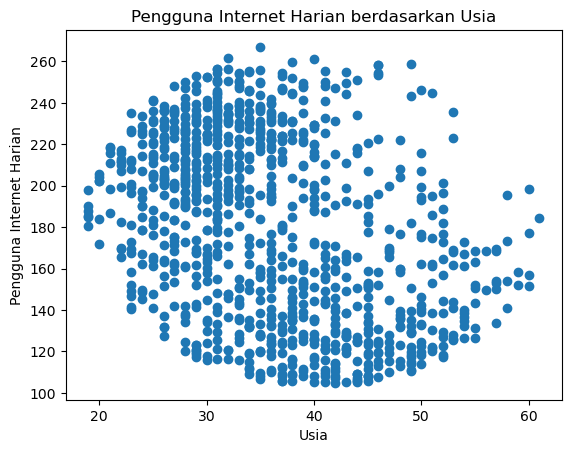

Korelasi antara Usia dan Pengguna Internet Harian: -0.37048122738914263
        Unnamed: 0  Daily Time Spent on Site          Age   Area Income  \
count  1000.000000                987.000000  1000.000000  9.870000e+02   
mean    499.500000                 64.929524    36.009000  3.848647e+08   
std     288.819436                 15.844699     8.785562  9.407999e+07   
min       0.000000                 32.600000    19.000000  9.797550e+07   
25%     249.750000                 51.270000    29.000000  3.286330e+08   
50%     499.500000                 68.110000    35.000000  3.990683e+08   
75%     749.250000                 78.460000    42.000000  4.583554e+08   
max     999.000000                 91.430000    61.000000  5.563936e+08   

       Daily Internet Usage  
count            989.000000  
mean             179.863620  
std               43.870142  
min              104.780000  
25%              138.710000  
50%              182.650000  
75%              218.790000  
max         

In [8]:
plt.scatter(df['Age'], df['Daily Internet Usage'])
plt.xlabel('Usia')
plt.ylabel('Pengguna Internet Harian')
plt.title('Pengguna Internet Harian berdasarkan Usia')

plt.show()

correlation = df['Age'].corr(df['Daily Internet Usage'])
print(f'Korelasi antara Usia dan Pengguna Internet Harian: {correlation}')

summary= df.describe()
print(summary)

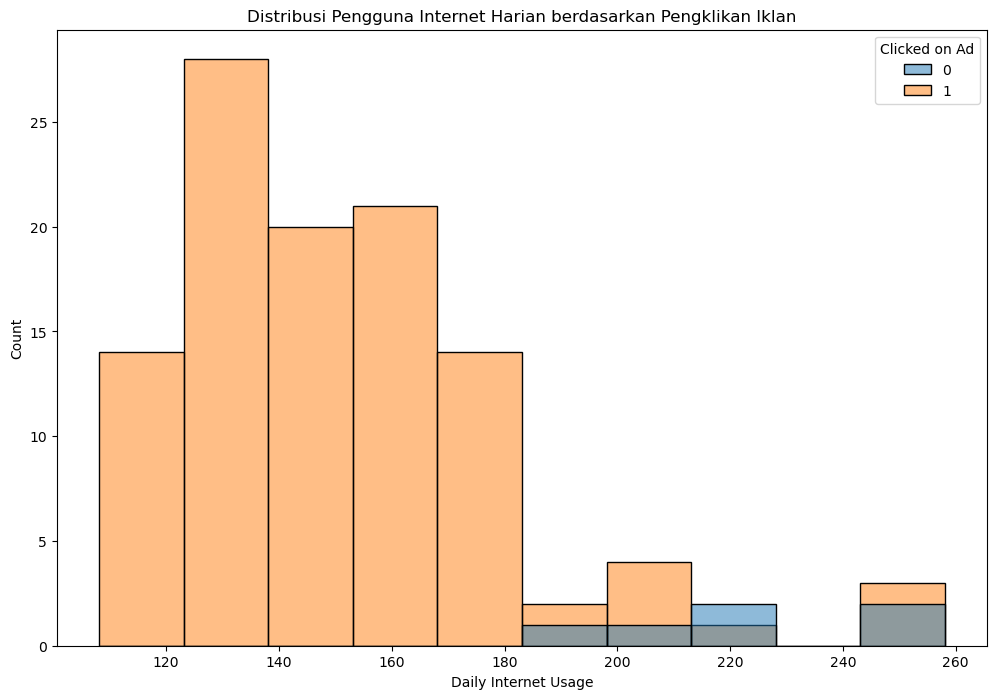

In [55]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Daily Internet Usage', hue='Clicked on Ad')
plt.title('Distribusi Pengguna Internet Harian berdasarkan Pengklikan Iklan')
plt.show()

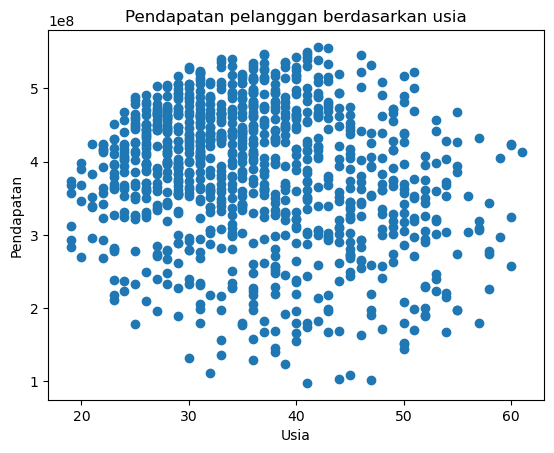

Hubungan Usia dan Pendapatan : -0.17934325680337762
        Unnamed: 0  Daily Time Spent on Site          Age   Area Income  \
count  1000.000000                987.000000  1000.000000  9.870000e+02   
mean    499.500000                 64.929524    36.009000  3.848647e+08   
std     288.819436                 15.844699     8.785562  9.407999e+07   
min       0.000000                 32.600000    19.000000  9.797550e+07   
25%     249.750000                 51.270000    29.000000  3.286330e+08   
50%     499.500000                 68.110000    35.000000  3.990683e+08   
75%     749.250000                 78.460000    42.000000  4.583554e+08   
max     999.000000                 91.430000    61.000000  5.563936e+08   

       Daily Internet Usage  
count            989.000000  
mean             179.863620  
std               43.870142  
min              104.780000  
25%              138.710000  
50%              182.650000  
75%              218.790000  
max              267.010000  


In [9]:
plt.scatter(df['Age'], df['Area Income'])
plt.xlabel('Usia')
plt.ylabel('Pendapatan')
plt.title('Pendapatan pelanggan berdasarkan usia')

plt.show()

correlation = df['Age'].corr(df['Area Income'])
print(f'Hubungan Usia dan Pendapatan : {correlation}')

summary = df.describe()
print(summary)

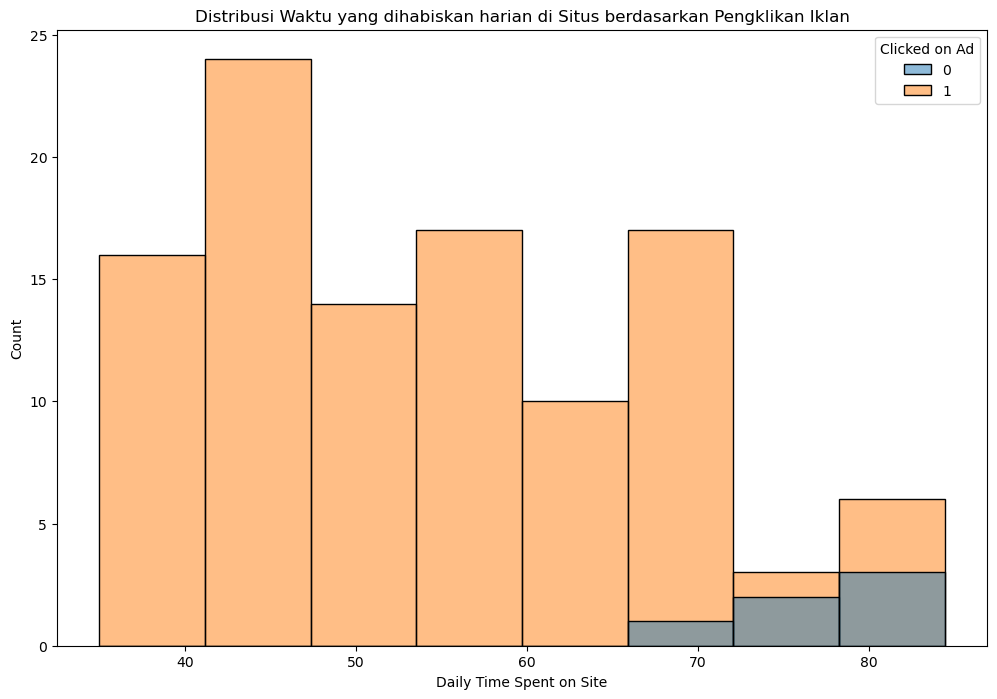

In [56]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Daily Time Spent on Site', hue='Clicked on Ad')
plt.title('Distribusi Waktu yang dihabiskan harian di Situs berdasarkan Pengklikan Iklan')
plt.show()

# 1c. Multivariate Analysis

<Axes: >

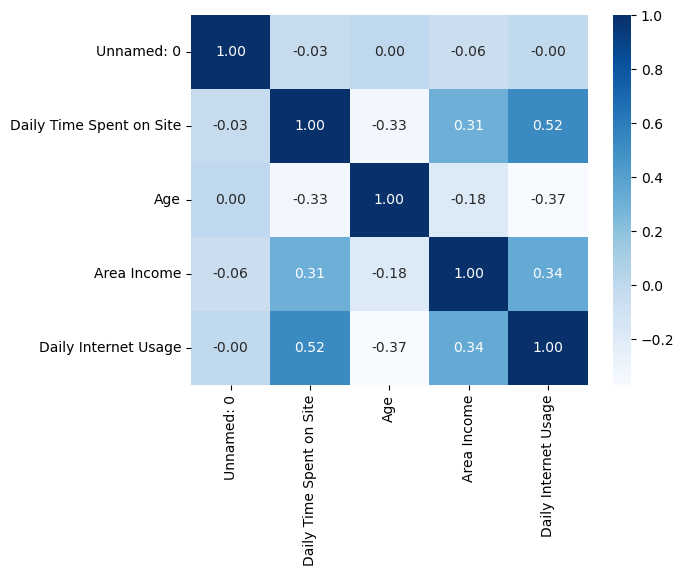

In [3]:
df = df.select_dtypes(exclude=['object'])
df_corr = df.corr()

sns.heatmap(df_corr, cmap='Blues', annot=True, fmt='.2f')

# 2. Data Cleansing and Processing

## 2a. Handling Missing Values

In [3]:
df.isnull().sum()

Unnamed: 0                   0
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64

In [4]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace=True)

In [5]:
df['Area Income'].fillna(df['Area Income'].median(), inplace=True)

In [6]:
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace=True)

In [7]:
df['Male'].fillna(df['Male'].mode()[0], inplace=True)

In [8]:
df.isnull().sum()

Unnamed: 0                  0
Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Male                        0
Timestamp                   0
Clicked on Ad               0
city                        0
province                    0
category                    0
dtype: int64

## 2b. Handling Duplicate Values

In [9]:
df.duplicated().sum()

0

## 2c. Handling Outliers

In [10]:
Q1 = df['Area Income'].quantile(0.25)
Q3 = df['Area Income'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 - (1.5 * IQR)
filtered_entries = ((df['Area Income'] >= low_limit) & (df['Area Income'] <= high_limit))
df = df[filtered_entries]

## 2d. Feature Encoding

In [5]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
7,7,66.00,48,172153310.0,131.76,Laki-Laki,3/7/2016 1:40,Yes,Bandar Lampung,Lampung,Health
14,14,42.95,33,216832000.0,143.56,Perempuan,3/24/2016 9:31,Yes,Padang,Sumatra Barat,Food
16,16,55.39,37,167558020.0,129.41,Perempuan,1/30/2016 19:20,Yes,Semarang,Jawa Tengah,Finance
18,18,54.70,36,217612780.0,NaN,Laki-Laki,2/13/2016 7:53,Yes,Makassar,Sulawesi Selatan,Travel
19,19,74.58,40,166752040.0,135.51,Laki-Laki,2/27/2016 4:43,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Fashion


In [11]:
mapping_male = { 'Laki-Laki' : 0, 
                'Perempuan' : 1 }

df['Male'] = df['Male'].map(mapping_male)

In [12]:
mapping_click = { 'Yes' : 1, 
                'No' : 0 }

df['Clicked on Ad'] = df['Clicked on Ad'].map(mapping_click)

In [13]:
median_clicked = df.groupby('city')['Clicked on Ad'].median()
df['city_clicked_encoded_mean'] = df['city'].map(median_clicked)

In [14]:
median_clicked = df.groupby('province')['Clicked on Ad'].median()
df['province_clicked_encoded_mean'] = df['province'].map(median_clicked)

In [15]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,city_clicked_encoded_mean,province_clicked_encoded_mean
7,7,66.00,48,172153310.0,131.76000,0,3/7/2016 1:40,1,Bandar Lampung,Lampung,Health,1.0,1.0
14,14,42.95,33,216832000.0,143.56000,1,3/24/2016 9:31,1,Padang,Sumatra Barat,Food,1.0,1.0
16,16,55.39,37,167558020.0,129.41000,1,1/30/2016 19:20,1,Semarang,Jawa Tengah,Finance,1.0,1.0
18,18,54.70,36,217612780.0,179.86362,0,2/13/2016 7:53,1,Makassar,Sulawesi Selatan,Travel,1.0,1.0
19,19,74.58,40,166752040.0,135.51000,0,2/27/2016 4:43,1,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Fashion,1.0,1.0


In [17]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,city_clicked_encoded_median,province_clicked_encoded_median
7,7,66.00,48,172153310.0,131.76,0,3/7/2016 1:40,1,Bandar Lampung,Lampung,Health,1.0,1.0
14,14,42.95,33,216832000.0,143.56,1,3/24/2016 9:31,1,Padang,Sumatra Barat,Food,1.0,1.0
16,16,55.39,37,167558020.0,129.41,1,1/30/2016 19:20,1,Semarang,Jawa Tengah,Finance,1.0,1.0
18,18,54.70,36,217612780.0,182.65,0,2/13/2016 7:53,1,Makassar,Sulawesi Selatan,Travel,1.0,1.0
19,19,74.58,40,166752040.0,135.51,0,2/27/2016 4:43,1,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Fashion,1.0,1.0


In [18]:
df['category'].describe()

count          113
unique          10
top       Otomotif
freq            17
Name: category, dtype: object

In [16]:
def mapping_category(category):
    if category in ['Bank', 'Finance']:
        return 'Finance' 
    elif category in ['Food', 'Health']:
        return 'FnB'
    elif category in ['House', 'Furniture', 'Electronic']:
        return 'Housing'
    elif category in ['Travel', 'Otomotif']:
        return 'Hobbies' 
    else:
        return 'others'

In [17]:
df['Ads_Category'] = df['category'].apply(mapping_category)

one_hot_encoded = pd.get_dummies(df['Ads_Category'], prefix='Category')

df = pd.concat([df, one_hot_encoded], axis=1)

In [18]:
for category in df['Ads_Category'].unique():
    df[category] = df['Ads_Category'] == category
    df[category] = df[category].astype(int)
    
df = df.drop(['Category_Finance', 'Category_FnB', 'Category_Hobbies', 'Category_Housing', 'Category_others'], axis=1)

In [20]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category,city_clicked_encoded_mean,province_clicked_encoded_mean,Ads_Category,FnB,Finance,Hobbies,others,Housing
7,7,66.00,48,172153310.0,131.76000,0,3/7/2016 1:40,1,Bandar Lampung,Lampung,Health,1.0,1.0,FnB,1,0,0,0,0
14,14,42.95,33,216832000.0,143.56000,1,3/24/2016 9:31,1,Padang,Sumatra Barat,Food,1.0,1.0,FnB,1,0,0,0,0
16,16,55.39,37,167558020.0,129.41000,1,1/30/2016 19:20,1,Semarang,Jawa Tengah,Finance,1.0,1.0,Finance,0,1,0,0,0
18,18,54.70,36,217612780.0,179.86362,0,2/13/2016 7:53,1,Makassar,Sulawesi Selatan,Travel,1.0,1.0,Hobbies,0,0,1,0,0
19,19,74.58,40,166752040.0,135.51000,0,2/27/2016 4:43,1,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Fashion,1.0,1.0,others,0,0,0,1,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 7 to 999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       113 non-null    int64  
 1   Daily Time Spent on Site         113 non-null    float64
 2   Age                              113 non-null    int64  
 3   Area Income                      113 non-null    float64
 4   Daily Internet Usage             113 non-null    float64
 5   Male                             113 non-null    int64  
 6   Timestamp                        113 non-null    object 
 7   Clicked on Ad                    113 non-null    int64  
 8   city                             113 non-null    object 
 9   province                         113 non-null    object 
 10  category                         113 non-null    object 
 11  city_clicked_encoded_median      113 non-null    float64
 12  province_clicked_encoded_me

## 2e. Feature Scaling

In [26]:
print(numericals)

['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']


In [19]:
df['Daily Time Spent on Site_norm'] = MinMaxScaler().fit_transform(df['Daily Time Spent on Site'].values.reshape(len(df), 1))
df['Daily Time Spent on Site_std'] = StandardScaler().fit_transform(df['Daily Time Spent on Site'].values.reshape(len(df), 1))

In [20]:
df[['Daily Time Spent on Site', 'Daily Time Spent on Site_norm', 'Daily Time Spent on Site_std']].describe()

,Daily Time Spent on Site,Daily Time Spent on Site_norm,Daily Time Spent on Site_std
count,113.000000,113.000000,1.130000e+02
mean,55.692288,0.418919,-3.478044e-16
std,13.379111,0.270340,1.004454e+00
min,34.960000,0.000000,-1.556504e+00
25%,44.130000,0.185290,-8.680540e-01
50%,54.880000,0.402506,-6.098361e-02
75%,66.000000,0.627197,7.738650e-01
max,84.450000,1.000000,2.159023e+00


In [21]:
df['Age_norm'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))

In [22]:
df[['Age', 'Age_norm', 'Age_std']].describe()

,Age,Age_norm,Age_std
count,113.000000,113.000000,1.130000e+02
mean,40.115044,0.462569,2.240096e-16
std,9.060070,0.244867,1.004454e+00
min,23.000000,0.000000,-1.897478e+00
25%,34.000000,0.297297,-6.779510e-01
50%,40.000000,0.459459,-1.275450e-02
75%,47.000000,0.648649,7.633080e-01
max,60.000000,1.000000,2.204567e+00


In [23]:
df['Area Income_norm'] = MinMaxScaler().fit_transform(df['Area Income'].values.reshape(len(df), 1))
df['Area Income_std'] = StandardScaler().fit_transform(df['Area Income'].values.reshape(len(df), 1))

In [24]:
df[['Area Income', 'Area Income_norm', 'Area Income_std']].describe()

,Area Income,Area Income_norm,Area Income_std
count,1.130000e+02,113.000000,1.130000e+02
mean,2.134595e+08,0.586189,-3.954555e-17
std,3.343849e+07,0.266621,1.004454e+00
min,1.399420e+08,0.000000,-2.208382e+00
25%,1.895129e+08,0.395251,-7.193295e-01
50%,2.185112e+08,0.626468,1.517457e-01
75%,2.393386e+08,0.792535,7.773787e-01
max,2.653580e+08,1.000000,1.558973e+00


In [25]:
df['Daily Internet Usage_norm'] = MinMaxScaler().fit_transform(df['Area Income'].values.reshape(len(df), 1))
df['Daily Internet Usage_std'] = StandardScaler().fit_transform(df['Area Income'].values.reshape(len(df), 1))

In [26]:
df[['Daily Internet Usage', 'Daily Internet Usage_norm', 'Daily Internet Usage_std']].describe()

,Daily Internet Usage,Daily Internet Usage_norm,Daily Internet Usage_std
count,113.000000,113.000000,1.130000e+02
mean,154.588326,0.586189,-3.954555e-17
std,34.126829,0.266621,1.004454e+00
min,108.150000,0.000000,-2.208382e+00
25%,129.330000,0.395251,-7.193295e-01
50%,147.610000,0.626468,1.517457e-01
75%,169.180000,0.792535,7.773787e-01
max,258.060000,1.000000,1.558973e+00


## 2f. Date Extraction

In [27]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%m/%d/%Y %H:%M')

In [28]:
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute

In [29]:
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,...,Age_std,Area Income_norm,Area Income_std,Daily Internet Usage_norm,Daily Internet Usage_std,Year,Month,Day,Hour,Minute
7,7,66.00,48,172153310.0,131.76000,0,2016-03-07 01:40:00,1,Bandar Lampung,Lampung,...,0.874174,0.256835,-1.240792,0.256835,-1.240792,2016,3,7,1,40
14,14,42.95,33,216832000.0,143.56000,1,2016-03-24 09:31:00,1,Padang,Sumatra Barat,...,-0.788817,0.613079,0.101306,0.613079,0.101306,2016,3,24,9,31
16,16,55.39,37,167558020.0,129.41000,1,2016-01-30 19:20:00,1,Semarang,Jawa Tengah,...,-0.345353,0.220195,-1.378829,0.220195,-1.378829,2016,1,30,19,20
18,18,54.70,36,217612780.0,179.86362,0,2016-02-13 07:53:00,1,Makassar,Sulawesi Selatan,...,-0.456219,0.619305,0.124759,0.619305,0.124759,2016,2,13,7,53
19,19,74.58,40,166752040.0,135.51000,0,2016-02-27 04:43:00,1,Jakarta Barat,Daerah Khusus Ibukota Jakarta,...,-0.012755,0.213769,-1.403040,0.213769,-1.403040,2016,2,27,4,43


# 3. Feature Selection

In [30]:
df = df.select_dtypes(exclude=['object'])
df_corr = df.corr()

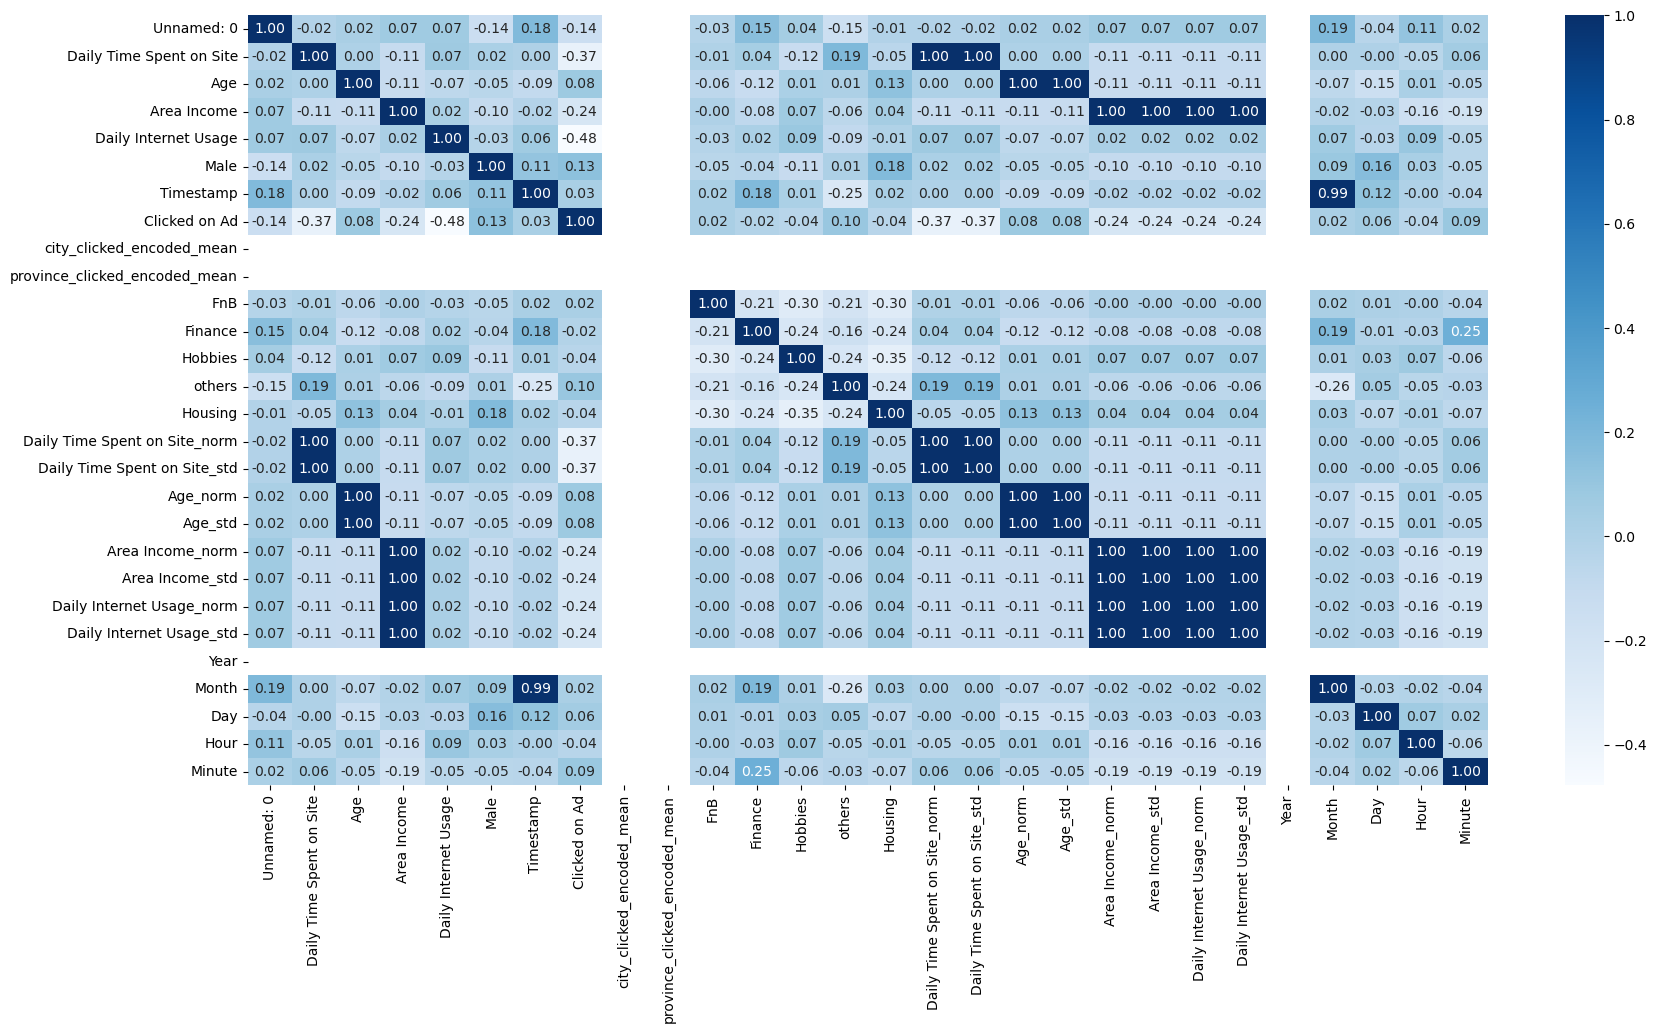

In [31]:
feature_corr = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(feature_corr, cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [32]:
correlation_with_target = df.corr()['Clicked on Ad'].abs()
correlation = correlation_with_target[correlation_with_target > 0.01].index
correlation

Index(['Unnamed: 0', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Timestamp', 'Clicked on Ad', 'FnB',
       'Finance', 'Hobbies', 'others', 'Housing',
       'Daily Time Spent on Site_norm', 'Daily Time Spent on Site_std',
       'Age_norm', 'Age_std', 'Area Income_norm', 'Area Income_std',
       'Daily Internet Usage_norm', 'Daily Internet Usage_std', 'Month', 'Day',
       'Hour', 'Minute'],
      dtype='object')

In [33]:
X = df.drop(['Unnamed: 0', 'Timestamp', 'Clicked on Ad'], axis=1)
y = df['Clicked on Ad']

In [34]:
k_best = SelectKBest(score_func=f_classif, k=10)
X_new = k_best.fit_transform(X, y)

selected_features_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_features_indices]
selected_features

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 5  6 20] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['Daily Time Spent on Site', 'Area Income', 'Daily Internet Usage',
       'Male', 'Daily Time Spent on Site_norm', 'Daily Time Spent on Site_std',
       'Area Income_norm', 'Area Income_std', 'Daily Internet Usage_norm',
       'Daily Internet Usage_std'],
      dtype='object')

In [49]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)
selected_features = fit.support_
selected_features

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True,  True,  True])

In [35]:
model = RandomForestClassifier()
model.fit(X, y)
feature_importances = model.feature_importances_
print(feature_importances)

[0.08267659 0.0260486  0.063805   0.14635566 0.01098988 0.
 0.         0.00827731 0.         0.00627946 0.00308767 0.01054434
 0.13262665 0.11950403 0.02087188 0.02114676 0.06771328 0.0601618
 0.05604748 0.04993541 0.         0.03285384 0.01784461 0.02561501
 0.03761473]


In [36]:
feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, feature_importances))
                               
for feature, importance in feature_importance_dict.items():
    print(f'{feature}')

Daily Time Spent on Site
Age
Area Income
Daily Internet Usage
Male
city_clicked_encoded_mean
province_clicked_encoded_mean
FnB
Finance
Hobbies
others
Housing
Daily Time Spent on Site_norm
Daily Time Spent on Site_std
Age_norm
Age_std
Area Income_norm
Area Income_std
Daily Internet Usage_norm
Daily Internet Usage_std
Year
Month
Day
Hour
Minute


In [37]:
set_1 = set(correlation)
set_2 = set(feature_names)
intersection_columns = list(set_1 & set_2)

intersection_columns

['Age',
 'Daily Time Spent on Site_std',
 'Day',
 'Area Income_norm',
 'Hobbies',
 'Area Income_std',
 'Age_norm',
 'Housing',
 'Daily Internet Usage_std',
 'Area Income',
 'others',
 'Daily Time Spent on Site_norm',
 'Daily Internet Usage_norm',
 'Month',
 'Hour',
 'Daily Internet Usage',
 'Daily Time Spent on Site',
 'Minute',
 'FnB',
 'Finance',
 'Age_std',
 'Male']

In [61]:
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
selected_features = lasso.coef_ !=0
print(selected_features)

[ True  True  True  True False  True False False False False False False
 False False False False False False False False False False False  True
  True  True]


# 4. Splitting data

In [41]:
df = df.rename(columns={'Clicked on Ad' : 'Clicked_on_Ad'})

In [94]:
df[intersection_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 113 entries, 7 to 999
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            113 non-null    int64  
 1   Daily Time Spent on Site_std   113 non-null    float64
 2   Day                            113 non-null    int32  
 3   Area Income_norm               113 non-null    float64
 4   Hobbies                        113 non-null    int32  
 5   Area Income_std                113 non-null    float64
 6   Age_norm                       113 non-null    float64
 7   Housing                        113 non-null    int32  
 8   Daily Internet Usage_std       113 non-null    float64
 9   Area Income                    113 non-null    float64
 10  others                         113 non-null    int32  
 11  Daily Time Spent on Site_norm  113 non-null    float64
 12  Daily Internet Usage_norm      113 non-null    float64


In [95]:
X = df[intersection_columns] 
y = df[['Clicked_on_Ad']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [97]:
# model 1 tanpa normalisasi

model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred1)
print('Akurasi eksperimen pertama :',  accuracy_1)

# model 2 dengan normalisasi

scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

model2 = RandomForestClassifier()
model2.fit(X_train_normalized, y_train)
y_pred2 = model2.predict(X_test_normalized)
accuracy_2 = accuracy_score(y_test, y_pred2)
print('Akurasi eksperimen kedua :', accuracy_2)

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Akurasi eksperimen pertama : 0.9565217391304348
Akurasi eksperimen kedua : 0.9565217391304348


C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [98]:
from sklearn.metrics import confusion_matrix, classification_report

# Eksperimen Pertama (Tanpa normalisasi)
confusion_matrix_1 = confusion_matrix(y_test, y_pred1)
classification_report_1 = classification_report(y_test, y_pred1)
print("Confusion Matrix Eksperimen Pertama:")
print(confusion_matrix_1)
print("Classification Report Eksperimen Pertama:")
print(classification_report_1)

# Eksperimen Kedua (Dengan normalisasi)
y_pred2 = model2.predict(X_test_normalized)  # Pastikan Anda mengonversi X_test ke format yang telah dinormalisasi
confusion_matrix_2 = confusion_matrix(y_test, y_pred2)
classification_report_2 = classification_report(y_test, y_pred2)
print("Confusion Matrix Eksperimen Kedua:")
print(confusion_matrix_2)
print("Classification Report Eksperimen Kedua:")
print(classification_report_2)

Confusion Matrix Eksperimen Pertama:
[[ 0  1]
 [ 0 22]]
Classification Report Eksperimen Pertama:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        22

    accuracy                           0.96        23
   macro avg       0.48      0.50      0.49        23
weighted avg       0.91      0.96      0.94        23

Confusion Matrix Eksperimen Kedua:
[[ 0  1]
 [ 0 22]]
Classification Report Eksperimen Kedua:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        22

    accuracy                           0.96        23
   macro avg       0.48      0.50      0.49        23
weighted avg       0.91      0.96      0.94        23



C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\

In [99]:
cm_1_df = pd.DataFrame(confusion_matrix_1, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
cm_2_df = pd.DataFrame(confusion_matrix_2, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])

# Menampilkan tabel confusion matrix
print("Confusion Matrix Eksperimen Pertama:")
print(cm_1_df)
print("Confusion Matrix Eksperimen Kedua:")
print(cm_2_df)

# Mencetak laporan klasifikasi
print("Classification Report Eksperimen Pertama:")
print(classification_report_1)
print("Classification Report Eksperimen Kedua:")
print(classification_report_2)

Confusion Matrix Eksperimen Pertama:
          Predicted 0  Predicted 1
Actual 0            0            1
Actual 1            0           22
Confusion Matrix Eksperimen Kedua:
          Predicted 0  Predicted 1
Actual 0            0            1
Actual 1            0           22
Classification Report Eksperimen Pertama:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        22

    accuracy                           0.96        23
   macro avg       0.48      0.50      0.49        23
weighted avg       0.91      0.96      0.94        23

Classification Report Eksperimen Kedua:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.96      1.00      0.98        22

    accuracy                           0.96        23
   macro avg       0.48      0.50      0.49        23
weighted avg       0.91      0.96    

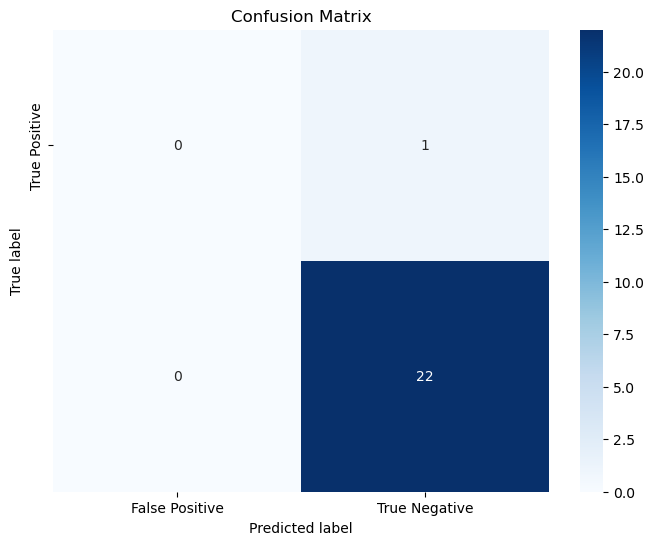

In [118]:
from sklearn.metrics import confusion_matrix

predictions = model1.predict(X_test)

cm = confusion_matrix(y_test, predictions)

labels_1 = ["False Positive", "True Negative"]
labels_2 = ["True Positive"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=labels_1, yticklabels=labels_2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


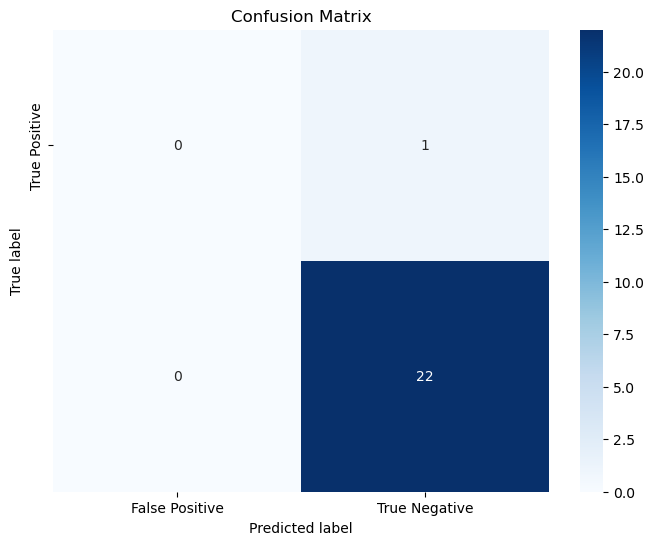

In [119]:
from sklearn.metrics import confusion_matrix

predictions = model2.predict(X_test)

cm = confusion_matrix(y_test, predictions)

labels_1 = ["False Positive", "True Negative"]
labels_2 = ["True Positive"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=labels_1, yticklabels=labels_2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# 5. Business Recommendation and Simulation

Berdasarkan hasil dari model menunjukkan fitur seperti Daily Time Spent on Site, Age, Area Income, Daily Internet, 
Usage, Male memiliki pengaruh yang cukup kuat terhadap iklan dalam website sedangkan fitur kategorik seperti kota, 
provins tidak memiliki pengaruh yang cukup kuat sedangkan fitur timestamp yang sudah terekstraksi dan category memiliki pengaruh yang cukup kuat.Sehingga berdasarkan fitur tersebut dapat direkomendasikan langkah bisnis sebagai berikut.

1. Penayangan iklan perlu melihat dari sisi usia, dalam hal ini jenis iklan yang sesuai dengan usia pelanggan sehingga mendapatkan perhatian lebih dari pelanggan.

2. Penayangan iklan dengan intensitas tinggi atau sering memerbesar peluang pelanggan untuk mengklik iklan hal 
ini juga selaras dengan penggunaan internet harian.

In [127]:
# Parameter awal
jumlah_pengguna = 1000
biaya_pemasaran = 10000  # Biaya pemasaran awal
tingkat_konversi_awal = 0
harga_produk = 50

# Perhitungan awal
jumlah_konversi = jumlah_pengguna * tingkat_konversi_awal
revenue = jumlah_konversi * harga_produk
profit = revenue - biaya_pemasaran

# Hasil awal
print("Hasil simulasi awal:")
print(f"Jumlah Pengguna: {jumlah_pengguna}")
print(f"Biaya Pemasaran: ${biaya_pemasaran}")
print(f"Tingkat Konversi: {tingkat_konversi_awal * 100}%")
print(f"Revenue: ${revenue}")
print(f"Profit: ${profit}")

# Simulasi dengan mengubah tingkat konversi
tingkat_konversi_baru = 0  # Ubah tingkat konversi menjadi 10%
jumlah_konversi_baru = jumlah_pengguna * tingkat_konversi_baru
revenue_baru = jumlah_konversi_baru * harga_produk
profit_baru = revenue_baru - biaya_pemasaran

# Hasil simulasi dengan tingkat konversi baru
print("\nHasil simulasi dengan tingkat konversi baru:")
print(f"Jumlah Pengguna: {jumlah_pengguna}")
print(f"Biaya Pemasaran: ${biaya_pemasaran}")
print(f"Tingkat Konversi: {tingkat_konversi_baru * 100}%")
print(f"Revenue: ${revenue_baru}")
print(f"Profit: ${profit_baru}")

Hasil simulasi awal:
Jumlah Pengguna: 1000
Biaya Pemasaran: $10000
Tingkat Konversi: 0%
Revenue: $0
Profit: $-10000

Hasil simulasi dengan tingkat konversi baru:
Jumlah Pengguna: 1000
Biaya Pemasaran: $10000
Tingkat Konversi: 0%
Revenue: $0
Profit: $-10000


In [128]:
# Parameter awal
jumlah_pengguna = 1000
biaya_pemasaran = 10000  # Biaya pemasaran awal
harga_produk = 50

# Hasil dari model machine learning
tingkat_konversi_model = 0 # Tingkat konversi yang diprediksi oleh model (contoh)

# Perhitungan revenue dan profit
jumlah_konversi = jumlah_pengguna * tingkat_konversi_model
revenue = jumlah_konversi * harga_produk
profit = revenue - biaya_pemasaran

# Hasil simulasi bisnis dengan model machine learning
print("Hasil simulasi bisnis dengan model machine learning:")
print(f"Jumlah Pengguna: {jumlah_pengguna}")
print(f"Biaya Pemasaran: ${biaya_pemasaran}")
print(f"Tingkat Konversi (berdasarkan model): {tingkat_konversi_model * 100}%")
print(f"Revenue: ${revenue}")
print(f"Profit: ${profit}")


Hasil simulasi bisnis dengan model machine learning:
Jumlah Pengguna: 1000
Biaya Pemasaran: $10000
Tingkat Konversi (berdasarkan model): 0%
Revenue: $0
Profit: $-10000
